# Best Selling Amazon Books Analyzer

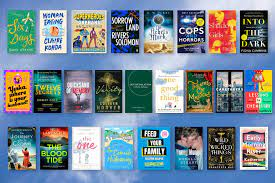

# Project Objective

The objective of this project is to analyze the dataset of Amazon’s top 50 best-selling books from 2009 to 2019 using Python and Pandas. The project aims to explore trends in book sales, identify the most popular authors, evaluate user ratings, compare the performance of fiction and non-fiction books, and examine pricing patterns over time. By cleaning, organizing, and analyzing the data, this project seeks to uncover meaningful insights that highlight factors contributing to a book’s success. Additionally, the project demonstrates practical applications of data analysis skills by exporting results for further use.

#### Step 1: Install Pandas 

In [1]:
#pip install pandas
print('done!')

done!


#### Step 2: Import pandas and Load the Spreadsheet

In [2]:
import pandas as pd

df = pd.read_csv('bestsellers.csv')
print('done!')

done!


#### Step 3: Explore the Data

In [3]:
# Get the first 5 rows of the spreadsheet
print(df.head())

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [4]:
# Get the shape of the spreadsheet
print(df.shape)

(550, 7)


In [5]:
# Get the column names of the spreadsheet
print(df.columns)

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')


In [6]:
# Get summary statistics for each column
print(df.describe())

       User Rating       Reviews       Price         Year
count   550.000000    550.000000  550.000000   550.000000
mean      4.618364  11953.281818   13.100000  2014.000000
std       0.226980  11731.132017   10.842262     3.165156
min       3.300000     37.000000    0.000000  2009.000000
25%       4.500000   4058.000000    7.000000  2011.000000
50%       4.700000   8580.000000   11.000000  2014.000000
75%       4.800000  17253.250000   16.000000  2017.000000
max       4.900000  87841.000000  105.000000  2019.000000


#### Step 4: Clean the Data

In [7]:
#Drop Duplicates

df.drop_duplicates(inplace=True)
print('Cleaned')

Cleaned


In [8]:
#Renaming Columns

df.rename(columns={"Name": "Title", "Year": "Publication Year", "User Rating": "Rating"}, inplace=True)
print('Renamed')

Renamed


In [9]:
#Converting Data Types

df["Price"] = df["Price"].astype(float)
print('Converted')

Converted


#### Step 5: Run an Analysis

In [10]:
#Analyzing Author Popularity

author_counts = df['Author'].value_counts()
print(author_counts)

Author
Jeff Kinney                           12
Suzanne Collins                       11
Gary Chapman                          11
Rick Riordan                          11
American Psychological Association    10
                                      ..
Maurice Sendak                         1
Cheryl Strayed                         1
The Staff of The Late Show with       1
Geneen Roth                            1
Ken Follett                            1
Name: count, Length: 248, dtype: int64


In [11]:
#Average Rating by Genre

avg_rating_by_genre = df.groupby("Genre")["Rating"].mean()
print(avg_rating_by_genre)

Genre
Fiction        4.648333
Non Fiction    4.595161
Name: Rating, dtype: float64


#### Step 6: Export the Results

In [12]:
#Exporting the top selling authors to a CSV file
author_counts.head(10).to_csv("top_authors.csv")

In [13]:
#Exportint the average rating by genre to a CSV file
avg_rating_by_genre.to_csv("avg_rating_by_genre.csv")

#### Additional Steps: Installed & Imported Seaborn and Matplotlib

In [16]:
#pip install seaborn
#pip install matplotlib

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

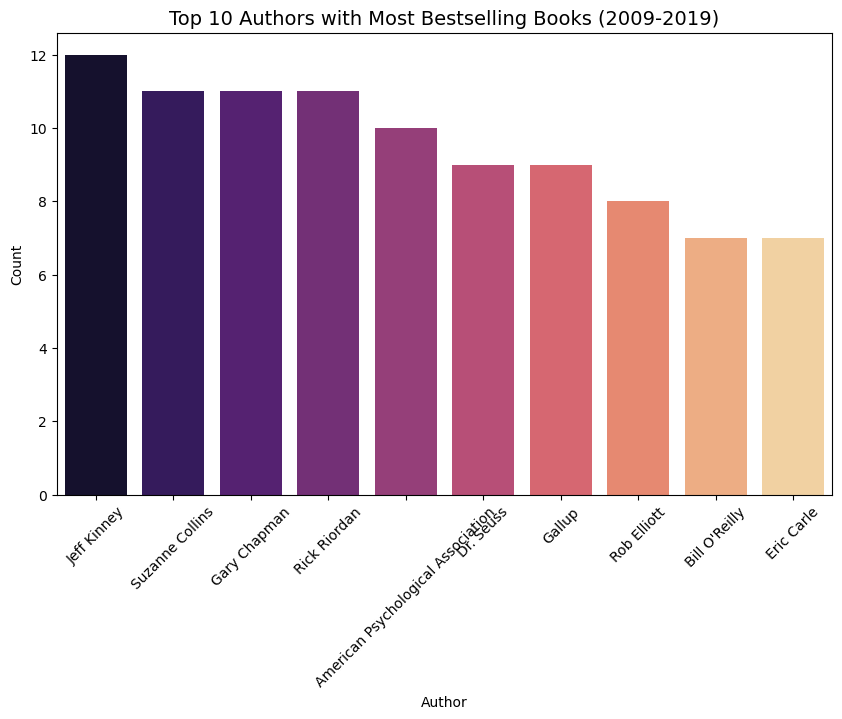

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_authors, x='Author', y='Count', hue='Author', dodge=False, legend=False, palette='magma')
plt.title("Top 10 Authors with Most Bestselling Books (2009-2019)", fontsize=14)
plt.xticks(rotation=45)
plt.show()


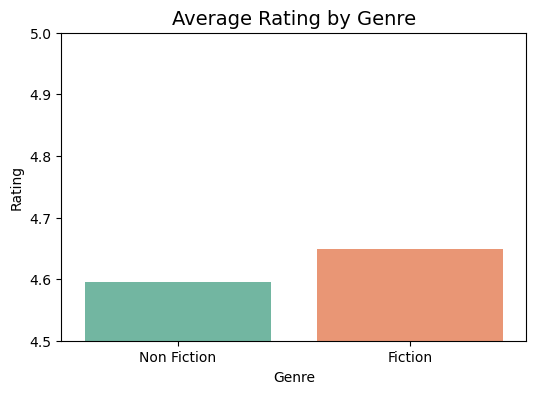

In [25]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Genre', y='Rating', hue='Genre', dodge=False, legend=False, palette='Set2', errorbar=None)
plt.title("Average Rating by Genre", fontsize=14)
plt.ylim(4.5, 5)
plt.show()

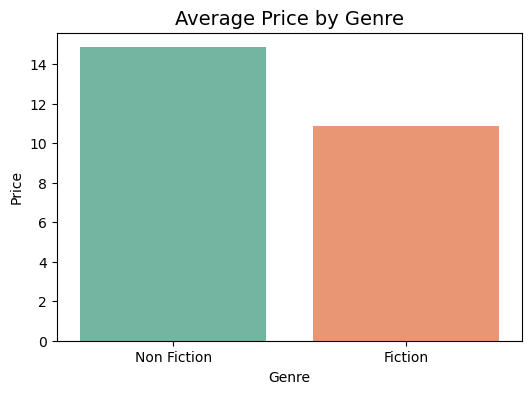

In [27]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Genre', y='Price', hue='Genre', dodge=False, legend=False, palette='Set2', errorbar=None)
plt.title("Average Price by Genre", fontsize=14)
plt.show()


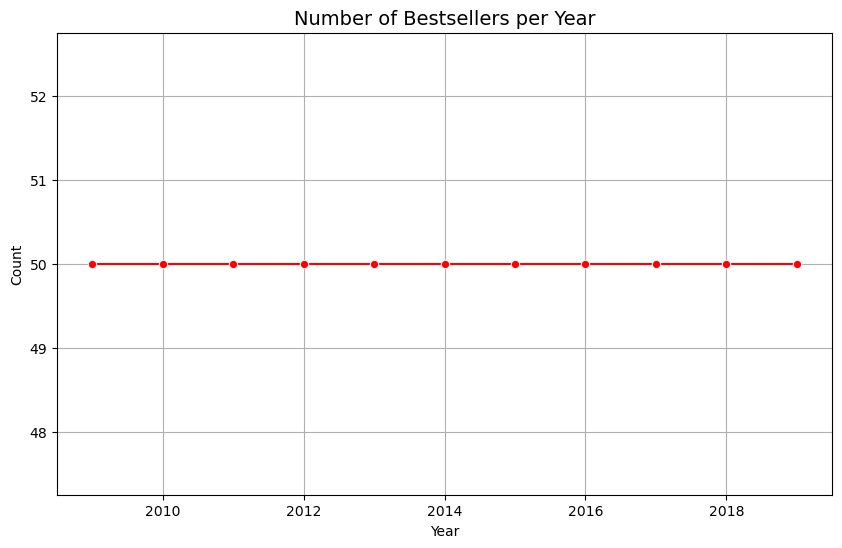

In [23]:
books_per_year = df['Publication Year'].value_counts().sort_index().reset_index()
books_per_year.columns = ['Year', 'Count']

plt.figure(figsize=(10,6))
sns.lineplot(data=books_per_year, x='Year', y='Count', marker='o', color='red')
plt.title("Number of Bestsellers per Year", fontsize=14)
plt.grid(True)
plt.show()

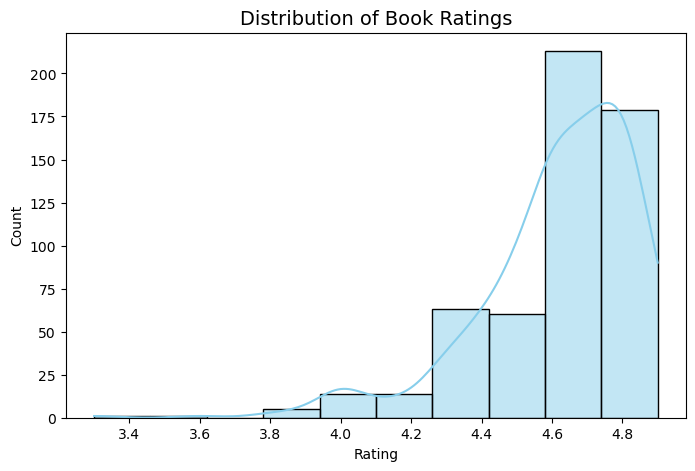

In [28]:
plt.figure(figsize=(8,5))
sns.histplot(df['Rating'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of Book Ratings", fontsize=14)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


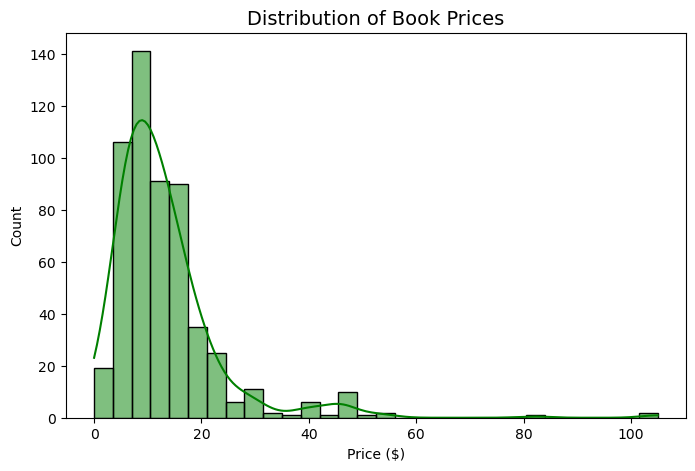

In [29]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=30, kde=True, color='green')
plt.title("Distribution of Book Prices", fontsize=14)
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.show()


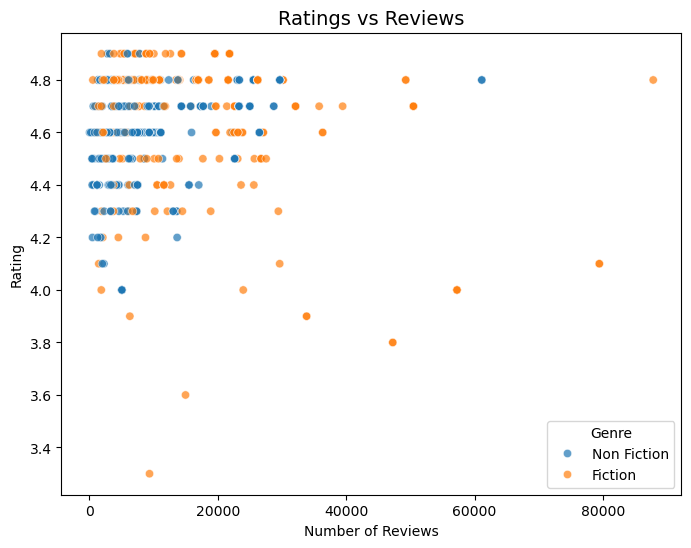

In [30]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Reviews', y='Rating', hue='Genre', alpha=0.7)
plt.title("Ratings vs Reviews", fontsize=14)
plt.xlabel("Number of Reviews")
plt.ylabel("Rating")
plt.legend(title="Genre")
plt.show()


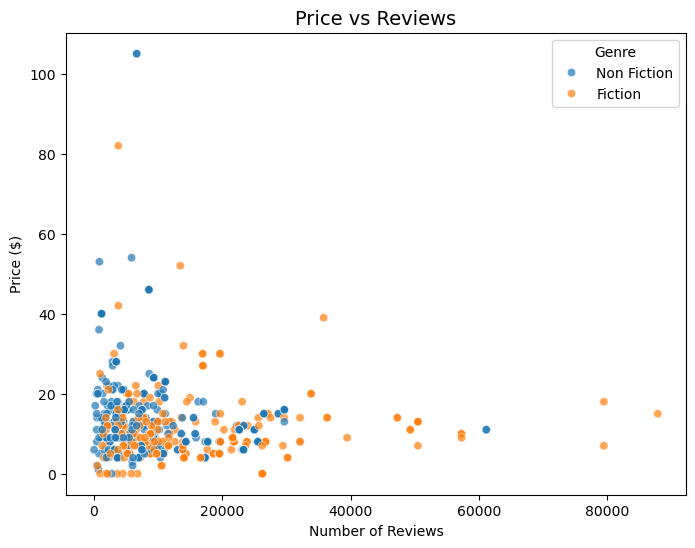

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Reviews', y='Price', hue='Genre', alpha=0.7)
plt.title("Price vs Reviews", fontsize=14)
plt.xlabel("Number of Reviews")
plt.ylabel("Price ($)")
plt.legend(title="Genre")
plt.show()


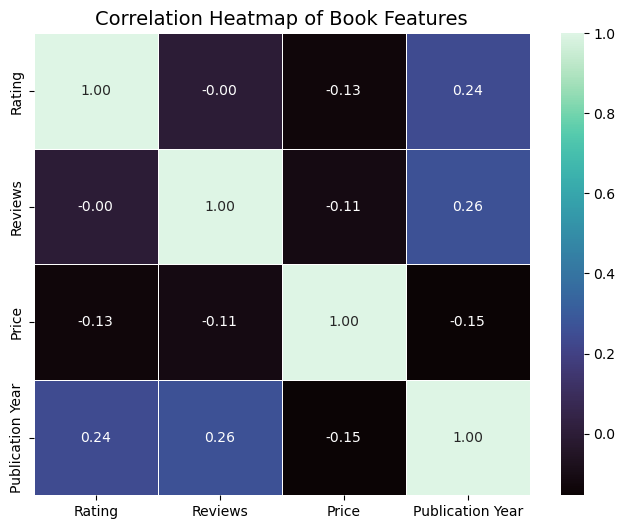

In [38]:
plt.figure(figsize=(8,6))

corr = df[['Rating', 'Reviews', 'Price', 'Publication Year']].corr()

sns.heatmap(corr, annot=True, cmap='mako', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Book Features", fontsize=14)
plt.show()


In [40]:
corr_with_rating = df.corr(numeric_only=True)['Rating'].sort_values(ascending=False).reset_index()
corr_with_rating.columns = ['Feature', 'Correlation with Rating']
print(corr_with_rating)

            Feature  Correlation with Rating
0            Rating                 1.000000
1  Publication Year                 0.242383
2           Reviews                -0.001729
3             Price                -0.133086


In [41]:
corr_with_reviews = df.corr(numeric_only=True)['Reviews'].sort_values(ascending=False).reset_index()
corr_with_reviews.columns = ['Feature', 'Correlation with Reviews']
print(corr_with_reviews)

            Feature  Correlation with Reviews
0           Reviews                  1.000000
1  Publication Year                  0.263560
2            Rating                 -0.001729
3             Price                 -0.109182


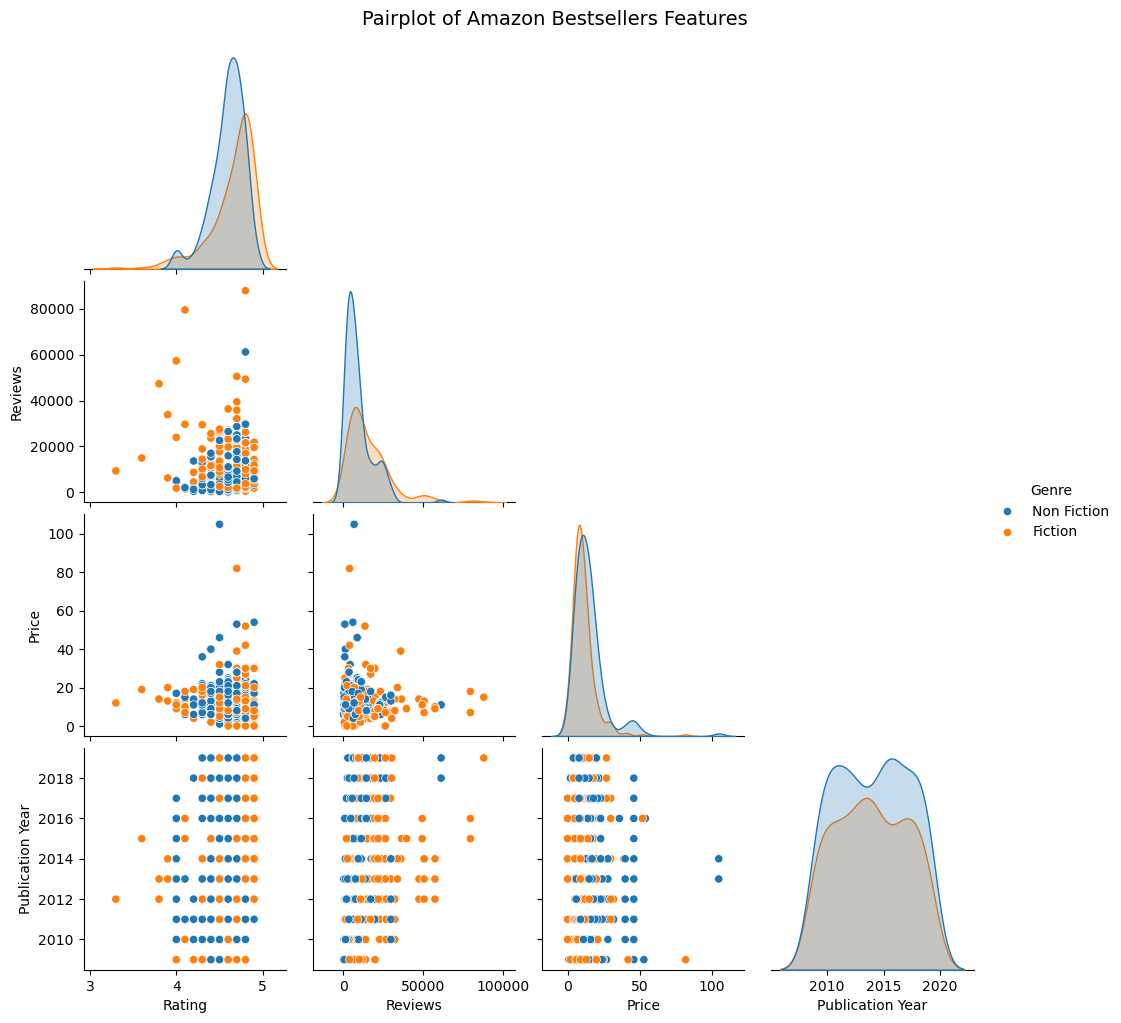

In [42]:
sns.pairplot(
    df[['Rating', 'Reviews', 'Price', 'Publication Year', 'Genre']], 
    hue='Genre', diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Amazon Bestsellers Features", y=1.02, fontsize=14)
plt.show()


In [44]:
import os
os.getcwd()

'C:\\Users\\HP\\Amazon Book'